### Sobre o notebook

Esse notebook contém diversas atividades envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada atividade e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para resolver a atividade, fique à vontade para acrescentar.

## Aula 1

### Atividade 1

A primeira etapa em um projeto de Machine Learning é a obtenção de dados. A partir disso, podemos fazer a leitura dos dados para explorar os dados. Como tarefa inicial, faça o upload do arquivo de dados para o Google Colab, importe a biblioteca `Pandas` e faça a leitura da base de dados.

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/dados_diabetes.csv')

In [3]:
dados

glicemia  pressao_sanguinea  dobra_cutanea_triceps  insulina   imc  \
0          89                 66                     23        94  28.1   
1         137                 40                     35       168  43.1   
2          78                 50                     32        88  31.0   
3         197                 70                     45       543  30.5   
4         189                 60                     23       846  30.1   
..        ...                ...                    ...       ...   ...   
389       181                 88                     44       510  43.3   
390       128                 88                     39       110  36.5   
391        88                 58                     26        16  28.4   
392       101                 76                     48       180  32.9   
393       121                 72                     23       112  26.2   

     idade diabetes  
0       21      NaN  
1       33      NaN  
2       26      sim  
3       53      NaN  
4       59      sim  
..     ...      ...  
389     26      NaN  
390     37      sim  
391     22      nao  
392     63      nao  
393     30      nao  

[394 rows x 7 columns]

### Atividade 2

Após realizar a leitura da base de dados, é importante checar a presença de dados nulos, que podem trazer barreiras para a construção de modelos de Machine Learning. Nesta tarefa, vasculhe os dados usando o método `info()` para verificar a presença de dados nulos.

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   glicemia               394 non-null    int64  
 1   pressao_sanguinea      394 non-null    int64  
 2   dobra_cutanea_triceps  394 non-null    int64  
 3   insulina               394 non-null    int64  
 4   imc                    394 non-null    float64
 5   idade                  394 non-null    int64  
 6   diabetes               265 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 21.7+ KB


In [5]:
dados['diabetes'].value_counts(dropna=False)

nao    173
NaN    129
sim     92
Name: diabetes, dtype: int64

### Atividade 3

Dados inconsistentes podem interferir no aprendizado de um modelo de Machine Learning, fazendo com que aprenda com padrões que não existem na realidade. Utilize o método
`describe()` para checar a inconsistência nos dados em cada uma das variáveis numéricas.

In [6]:
dados.describe()

glicemia  pressao_sanguinea  dobra_cutanea_triceps    insulina  \
count  394.000000         394.000000             394.000000  394.000000   
mean   122.304569          70.654822              29.106599  155.548223   
std     31.396725          12.469919              10.504273  118.775855   
min      0.000000          24.000000               7.000000   14.000000   
25%     99.000000          62.000000              21.000000   76.250000   
50%    119.000000          70.000000              29.000000  125.000000   
75%    143.000000          78.000000              36.750000  190.000000   
max    198.000000         110.000000              63.000000  846.000000   

              imc       idade  
count  394.000000  394.000000  
mean    32.988579   30.814721  
std      7.210160   10.198971  
min      0.000000   21.000000  
25%     28.325000   23.000000  
50%     33.200000   27.000000  
75%     37.075000   36.000000  
max     67.100000   81.000000

## Aula 2

### Atividade 1

Para o treinamento de um modelo de classificação supervisionado, é preciso de variáveis explicativas que contêm características importantes dos dados e de uma variável alvo, contendo as respostas. Os dados da variável alvo não podem ser nulos, uma vez que, com isso, o modelo não pode compreender qual é a regra necessária para se chegar ao resultado. Na base de dados fornecida, a coluna 'diabetes' é a variável alvo e contém dados nulos.

Sendo assim, remova os dados nulos da variável alvo e divida o conjunto de dados entre variáveis explicativas (x) e variável alvo (y), para que possam ser usadas para treinamento de um modelo de classificação.

In [7]:
dados_rotulados = dados.dropna()

In [8]:
dados_rotulados['diabetes'].value_counts(dropna=False)

nao    173
sim     92
Name: diabetes, dtype: int64

In [9]:
x = dados_rotulados.drop('diabetes', axis = 1)
y = dados_rotulados['diabetes']

### Atividade 2

Para gerar um modelo de Machine Learning, certos requisitos precisam ser cumpridos. A depender do algoritmo utilizado, os dados precisam estar em um formato numérico e no caso do SVM, os dados das variáveis explicativas precisam estar em uma mesma escala, para que não gerem um impacto diferente no cálculo de distâncias.

Por conta disso, realize a transformação dos dados da variável alvo ('diabetes') para o formato numérico usando o método [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) e transforme as variáveis explicativas para a mesma escala usando o método [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [12]:
y

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0])

In [13]:
label_encoder.inverse_transform([0, 1])

array(['nao', 'sim'], dtype=object)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
x_normalizado = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x_normalizado

glicemia  pressao_sanguinea  dobra_cutanea_triceps  insulina       imc  \
0    0.076923           0.263158               0.446429  0.088942  0.291771   
1    0.930769           0.394737               0.285714  1.000000  0.269327   
2    0.753846           0.552632               0.214286  0.193510  0.162095   
3    0.269231           0.000000               0.553571  0.082933  0.598504   
4    0.361538           0.526316               0.410714  0.098558  0.381546   
..        ...                ...                    ...       ...       ...   
260  0.407692           0.631579               0.571429  0.072115  0.491272   
261  0.461538           0.763158               0.571429  0.115385  0.428928   
262  0.153846           0.368421               0.339286  0.002404  0.226933   
263  0.253846           0.605263               0.732143  0.199519  0.339152   
264  0.407692           0.552632               0.285714  0.117788  0.172070   

        idade  
0    0.119048  
1    0.904762  
2    0.714286  
3    0.285714  
4    0.261905  
..        ...  
260  0.166667  
261  0.380952  
262  0.023810  
263  1.000000  
264  0.214286  

[265 rows x 6 columns]

### Atividade 3

A partir de dados tratados e transformados, é possível treinar um modelo de Machine Learning e avaliar o desempenho do modelo treinado.

Utilizando os dados da atividade anterior, faça a divisão dos dados entre treinamento e teste, usando o método [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de forma estratificada e depois ajuste um modelo de classificação SVM a partir dos dados de treinamento, avaliando o desempenho com o [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) a partir dos dados de teste e das previsões geradas pelo modelo.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, stratify = y, random_state = 10)

In [18]:
from sklearn.svm import SVC

In [19]:
svm = SVC(kernel = 'linear', random_state = 10)
svm.fit(x_treino, y_treino)

SVC(kernel='linear', random_state=10)

In [20]:
from sklearn.metrics import classification_report

In [21]:
y_previsto = svm.predict(x_teste)
resultados_svm = classification_report(y_teste, y_previsto)
print(resultados_svm)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.88      0.65      0.75        23

    accuracy                           0.85        67
   macro avg       0.86      0.80      0.82        67
weighted avg       0.85      0.85      0.84        67



## Aula 3

### Atividade 1

A abordagem semi supervisionada consiste em utilizar dados não rotulados para melhorar a performance de um modelo de Machine Learning. Nesta tarefa, selecione os dados não rotulados da base de dados de diabetes e faça a transformação dos dados para a mesma escala usando o MinMaxScaler.

In [22]:
dados_sem_rotulo = dados[dados['diabetes'].isna()].drop('diabetes', axis = 1)

In [23]:
dados_sem_rotulo_normalizados = pd.DataFrame(scaler.transform(dados_sem_rotulo), columns = dados_sem_rotulo.columns)

### Atividade 2

A partir dos dados normalizados, é possível utilizar os dados para o modelo Pseudo Labeling, mas antes é necessário obter os pseudo rótulos a partir das previsões. Nesta atividade, utilize o modelo SVM supervisionado para fazer a previsão dos dados não rotulados e depois utilize o [`pd.concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) para concatenar os dados rotulados com os pseudo rótulos, gerando uma nova base de treinamento.

In [24]:
y_previsto = svm.predict(dados_sem_rotulo_normalizados)

In [25]:
y_previsto

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [26]:
novo_x_treino = pd.concat([x_treino, dados_sem_rotulo_normalizados], ignore_index = True)
novo_x_treino

glicemia  pressao_sanguinea  dobra_cutanea_triceps  insulina       imc  \
0    0.315385           0.605263               0.571429  0.120192  0.214464   
1    0.515385           0.500000               0.625000  0.283654  0.573566   
2    0.076923           0.263158               0.446429  0.088942  0.291771   
3    0.569231           0.789474               0.303571  0.560096  0.276808   
4    0.269231           0.552632               0.446429  0.211538  0.458853   
..        ...                ...                    ...       ...       ...   
322  0.623077           0.500000               0.392857  0.135817  0.249377   
323  0.261538           0.184211               0.232143  0.096154  0.286783   
324  0.653846           0.763158               0.535714  0.151442  0.531172   
325  0.100000           0.578947               0.607143  0.051683  0.673317   
326  0.869231           0.763158               0.660714  0.596154  0.598504   

        idade  
0    0.238095  
1    0.071429  
2    0.119048  
3    0.523810  
4    0.809524  
..        ...  
322  0.500000  
323  0.119048  
324  0.428571  
325  0.261905  
326  0.119048  

[327 rows x 6 columns]

In [27]:
novo_y_treino = pd.concat([pd.Series(y_treino), pd.Series(y_previsto)], ignore_index = True)
novo_y_treino

0      1
1      1
2      1
3      1
4      0
      ..
322    1
323    0
324    1
325    0
326    1
Length: 327, dtype: int64

### Atividade 3

A partir de dados de treinamento, é possível ajustar um modelo de Machine Learning. Nesta tarefa, utilize os dados da atividade anterior para treinar um modelo Pseudo Labeling com o algoritmo SVM. Compare os resultados com o modelo anterior utilizando o [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [28]:
pseudo_labeling = SVC(kernel = 'linear', random_state = 10)
pseudo_labeling.fit(novo_x_treino, novo_y_treino)

SVC(kernel='linear', random_state=10)

In [29]:
novo_y_previsto = pseudo_labeling.predict(x_teste)
resultados_pseudo_labeling = classification_report(y_teste, novo_y_previsto)

In [30]:
print('SVM Supervisionado')
print(resultados_svm)
print('-'*50)
print('SVM Pseudo Labeling')
print(resultados_pseudo_labeling)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.88      0.65      0.75        23

    accuracy                           0.85        67
   macro avg       0.86      0.80      0.82        67
weighted avg       0.85      0.85      0.84        67

--------------------------------------------------
SVM Pseudo Labeling
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        44
           1       0.94      0.65      0.77        23

    accuracy                           0.87        67
   macro avg       0.89      0.81      0.84        67
weighted avg       0.88      0.87      0.86        67



## Aula 4

### Atividade 1

Para se treinar um modelo usando a técnica Self Training, é necessário selecionar os rótulos mais confiantes das previsões geradas por um modelo de Machine Learning a partir de dados não rotulados. Nesta tarefa, treine um modelo usando o algoritmo SVM e utilize o método [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.predict_proba) para construir uma tabela de probabilidades com as previsões de cada uma das classes da variável alvo 'diabetes'. A tabela deve conter as colunas: probabilidade da classe 0, probabilidade da classe 1, valor da previsão e probabilidade máxima da previsão.

In [31]:
svm = SVC(kernel = 'linear', probability = True, random_state = 10)
svm.fit(x_treino, y_treino)

SVC(kernel='linear', probability=True, random_state=10)

In [32]:
probabilidades = svm.predict_proba(dados_sem_rotulo_normalizados)
y_previsto = svm.predict(dados_sem_rotulo_normalizados)

In [33]:
tabela_resultados = pd.DataFrame(probabilidades, columns = ['Prob C0', 'Prob C1'])
tabela_resultados['Previsão'] = y_previsto
tabela_resultados['Probabilidade máxima'] = tabela_resultados[['Prob C0', 'Prob C1']].max(axis = 1)

In [34]:
tabela_resultados

Prob C0   Prob C1  Previsão  Probabilidade máxima
0    0.904047  0.095953         0              0.904047
1    0.470117  0.529883         1              0.529883
2    0.113261  0.886739         1              0.886739
3    0.543812  0.456188         0              0.543812
4    0.656023  0.343977         0              0.656023
..        ...       ...       ...                   ...
124  0.489352  0.510648         1              0.510648
125  0.847831  0.152169         0              0.847831
126  0.370985  0.629015         1              0.629015
127  0.777639  0.222361         0              0.777639
128  0.228988  0.771012         1              0.771012

[129 rows x 4 columns]

### Atividade 2

Com os resultados de probabilidade das previsões, é possível filtrar os dados e gerar um novo conjunto de treinamento com dados rotulados e pseudo rótulos. Nesta atividade, faça um filtro da base de dados não rotulada em que a probabilidade de previsão dada pelo modelo tenha uma confiança maior do que 0.75. Crie um novo conjunto de treinamento, com variáveis explicativas e variável alvo, contendo os dados rotulados e pseudo rótulos com confiança maior que 0.75 usando o método [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html).

<Axes: ylabel='Frequency'>

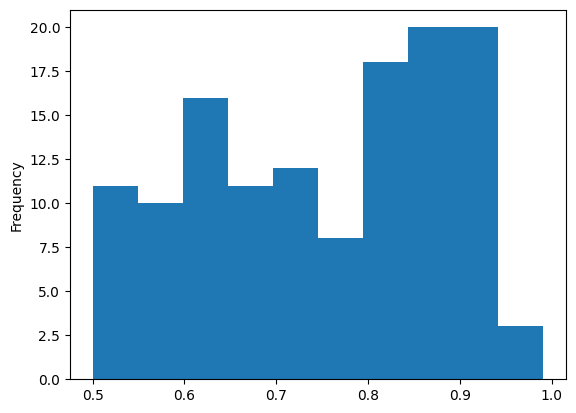

In [35]:
tabela_resultados['Probabilidade máxima'].plot(kind = 'hist')

In [36]:
filtro_confianca = tabela_resultados['Probabilidade máxima'] > 0.75
novo_x_treino = pd.concat([x_treino, dados_sem_rotulo_normalizados[filtro_confianca]])
novo_y_treino = pd.concat([pd.Series(y_treino), tabela_resultados.loc[filtro_confianca, 'Previsão']])

### Atividade 3

Prosseguindo com os resultados da atividade anterior, treine um modelo SVM utilizando os dados de treinamento e obtenha o resultado das métricas com o `classification_report`, comparando os resultados com o modelo SVM supervisionado que foi gerado nas aulas anteriores.

In [37]:
svm = SVC(kernel = 'linear', probability = True, random_state = 10)
svm.fit(novo_x_treino, novo_y_treino)

SVC(kernel='linear', probability=True, random_state=10)

In [38]:
novo_y_previsto = svm.predict(x_teste)
resultados_self_training1 = classification_report(y_teste, novo_y_previsto)

In [39]:
print('SVM Supervisionado')
print(resultados_svm)
print('-'*50)
print('SVM Self Training 1º estágio')
print(resultados_self_training1)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.88      0.65      0.75        23

    accuracy                           0.85        67
   macro avg       0.86      0.80      0.82        67
weighted avg       0.85      0.85      0.84        67

--------------------------------------------------
SVM Self Training 1º estágio
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.88      0.65      0.75        23

    accuracy                           0.85        67
   macro avg       0.86      0.80      0.82        67
weighted avg       0.85      0.85      0.84        67



### Atividade 4

A biblioteca Scikit-Learn facilita os processos de treinamento de modelos de Machine Learning, incluindo algoritmos de aprendizado semi-supervisionado. Nesta tarefa, utilize o algoritmo [`SelfTraining`]() da biblioteca Scikit-Learn a partir de um algoritmo SVM. Para treinamento do modelo, é necessário utilizar um conjunto de treinamento em que os dados não rotulados recebem o rótulo -1, portanto gere um conjunto de treinamentos com essas características antes de realizar o treinamento. Obtenha o resultado das métricas e compare com o algoritmo Self Training com apenas 1 estágio da atividade anterior.


In [40]:
from sklearn.semi_supervised import SelfTrainingClassifier

In [41]:
pd.Series([-1]*dados_sem_rotulo_normalizados.shape[0])

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
124   -1
125   -1
126   -1
127   -1
128   -1
Length: 129, dtype: int64

In [42]:
x_treino_self_training = pd.concat([x_treino, dados_sem_rotulo_normalizados], ignore_index = True)
y_treino_self_training = pd.concat([pd.Series(y_treino), pd.Series([-1]*dados_sem_rotulo_normalizados.shape[0])], ignore_index = True)

In [43]:
svm = SVC(kernel = 'linear', probability= True, random_state = 10)
self_training = SelfTrainingClassifier(svm, threshold = 0.80, max_iter = 15, verbose = True)

In [44]:
self_training.fit(x_treino_self_training, y_treino_self_training)

End of iteration 1, added 58 new labels.
End of iteration 2, added 11 new labels.
End of iteration 3, added 4 new labels.
End of iteration 4, added 1 new labels.
End of iteration 5, added 1 new labels.
End of iteration 6, added 1 new labels.


SelfTrainingClassifier(base_estimator=SVC(kernel='linear', probability=True,
                                          random_state=10),
                       max_iter=15, threshold=0.8, verbose=True)

In [45]:
y_previsto = self_training.predict(x_teste)
resultados_self_training = classification_report(y_teste, y_previsto)

In [46]:
print('SVM Supervisionado')
print(resultados_svm)
print('-'*50)
print('SVM Self Training 1º estágio')
print(resultados_self_training1)
print('-'*50)
print('SVM Self Training')
print(resultados_self_training)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.88      0.65      0.75        23

    accuracy                           0.85        67
   macro avg       0.86      0.80      0.82        67
weighted avg       0.85      0.85      0.84        67

--------------------------------------------------
SVM Self Training 1º estágio
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.88      0.65      0.75        23

    accuracy                           0.85        67
   macro avg       0.86      0.80      0.82        67
weighted avg       0.85      0.85      0.84        67

--------------------------------------------------
SVM Self Training
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        44
           1       0.94      0.65      0.77        23

    accuracy  

## Aula 5

### Atividade 1

O [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) é um algoritmo semi supervisionado que propaga os rótulos da base de dados para os dados que não possuem rótulos a partir da similaridade entre os registros. Nesta atividade, treine um modelo `LabelPropagation` a partir dos dados de treinamento que foram utilizados para treinar o modelo `SelfTraining`, obtendo o resultado do desempenho deste modelo usando o `classification_report` com os dados de teste.

In [47]:
from sklearn.semi_supervised import LabelPropagation

In [48]:
label_propagation = LabelPropagation()

In [49]:
label_propagation.fit(x_treino_self_training, y_treino_self_training)

LabelPropagation()

In [50]:
y_previsto = label_propagation.predict(x_teste)
resultados_label_propagation = classification_report(y_teste, y_previsto)

### Atividade 2

Em um projeto de Machine Learning, temos o intuito de obter um modelo que faça a classificação da melhor maneira possível para que seja utilizado em produção. Nesta atividade, compare os resultados do modelo `LabelPropagation` com o modelo `SelfTraining` e selecione o modelo que tem o melhor desempenho. Utilize a biblioteca [`pickle`](https://docs.python.org/3/library/pickle.html) para armazenar o resultado do modelo de classificação e do modelo de normalização de dados `MinMaxScaler`.

In [51]:
print('SVM Self Training')
print(resultados_self_training)
print('-'*50)
print('Label Propagation')
print(resultados_label_propagation)

SVM Self Training
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        44
           1       0.94      0.65      0.77        23

    accuracy                           0.87        67
   macro avg       0.89      0.81      0.84        67
weighted avg       0.88      0.87      0.86        67

--------------------------------------------------
Label Propagation
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        44
           1       0.93      0.57      0.70        23

    accuracy                           0.84        67
   macro avg       0.87      0.77      0.79        67
weighted avg       0.85      0.84      0.82        67



In [52]:
import pickle

In [53]:
with open('min_max_scaler.pkl', 'wb') as arquivo:
    pickle.dump(scaler, arquivo)

In [54]:
with open('modelo_self_training.pkl', 'wb') as arquivo:
    pickle.dump(self_training, arquivo)

In [55]:
modelo_min_max = pd.read_pickle('/content/min_max_scaler.pkl')
modelo_self_training = pd.read_pickle('/content/modelo_self_training.pkl')

### Atividade 3

A partir de arquivos de modelos serializados, é possível utilizar os modelos em produção para fazer classificação de novos dados. Nesta tarefa, simule a previsão de um novo dado a partir dos modelos armazenados na atividade anterior, fazendo a leitura dos modelos, normalização dos dados para a mesma escala e usando o método `predict` para realizar a predição do seguinte dado:

```
novo_dado = {
    'glicemia':[98],
    'pressao_sanguinea':[75],
    'dobra_cutanea_triceps':[29],
    'insulina':[124],
    'imc':[24.3],
    'idade':[34]
}
```


In [56]:
novo_dado = {
    'glicemia':[98],
    'pressao_sanguinea':[75],
    'dobra_cutanea_triceps':[29],
    'insulina':[124],
    'imc':[24.3],
    'idade':[34]
}

In [57]:
novo_dado = pd.DataFrame(novo_dado)
novo_dado

glicemia  pressao_sanguinea  dobra_cutanea_triceps  insulina   imc  idade
0        98                 75                     29       124  24.3     34

In [58]:
novo_dado = modelo_min_max.transform(novo_dado)
modelo_self_training.predict(novo_dado)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(


array([0])

In [59]:
label_encoder.inverse_transform([0])

array(['nao'], dtype=object)